**Part I: Questions about the article **



**1. Which types of solutions does the repressilator model generate?**


Firstly, it can create a deterministic, continuous approximation corresponding to the stable steady state. Secondly, sustained limit-cycle oscillations can be modeled which would correspond to a stochastic, discrete approximation. This solution also take into consideration cooperativity


**2. To obtain a system that oscillates, what are the three key parameters that are more important?**

To obtain a system that oscillates, the three key parameters are:
Hill coefficient (n)
Protein degradation rate(γ)
Transcription/translation rates (often combined as a single parameter β)
Strong Promoters: The system needs strong promoters that drive efficient gene expression.
Tight Repression: The repressors need to tightly inhibit their target genes (low "leakiness"), so the system can effectively switch between states.
Comparable Decay Rates: The proteins and their mRNA must have similar decay rates to maintain balanced, regular oscillations.
ask the teacher what he means by key parameters

**3. How did the authors engineer the system to ensure oscillations?**

To ensure oscillations, the authors used hybrid promoters (PLlac01, PLtet01) for tighter repression. They also engineered the effective repressor protein lifetimes to be closer to that of mRNA (about 2 min, on average, in E.coli 7 ). They then inserted a carboxy-terminal tag, at the end of each repressor gene to reduce protein half-lives from 60 minutes to 4 minutes. They did the same with the GFP to obtain an unstable GFP variant with a 30-40-minute half-life.


**4. What is the readout of the oscillations? **

The readout of the oscillations was green fluorescent protein (GFP) expression, which was used as a reporter for one of the repressor proteins depending on the state of the network in the individual cell.


**5. What is the period and amplitude (approximately) of the observed oscillations? Did all the cells oscillate?**

The range of periods, as estimated by the distribution of peak-to-peak intervals, is 160 +/- 40 min. The authors observed significant variations in the period and amplitude of the oscillator output both from cell to cell, and over time in a single cell and its descendants.
No, not all cells showed oscillations, 40% of cells did.

**6. What was the decorrelation time? What does it mean? How does stochasticity affect the decorrelation time?**

The decorrelation time was 95 ± 10 minutes. This means in other words: the time over which oscillations in individual cells lose synchronization with each other.
This indicates that the state of the network is transmitted to the progeny cells, despite a strong noise component.
Simulations of the repressilator that take into account the stochastic nature of reaction events and discreteness of network components also exhibit significant variability, reducing the correlation time for oscillations from infinity (in the continuous model) to about two periods due to noise and inability to synchronize across the population.

**7. The authors argue that the state of the oscillator is transmitted from generation to generation (Fig 3). How do you think this happens?**

The authors argue that after septation of the cells, the GFP levels in the two sibling cells often remain correlated with one another for long periods of time. An average half-time for sibling decorrelation is 95 + 10 min, which is longer than the typical cell-division times of 50±70 min under these conditions. This indicates that the state of the network is transmitted to the progeny cells, despite a strong noise component. If it would not be transmitted, the cells would restart the oscillation cycle from the beginning leading to discontinuous oscillation curves. Significant variations in the period and amplitude of the oscillator output both from cell to cell were observed and over time in a single cell and its descendants. In some individuals,periods were omitted or phase delayed in one cell relative to its sibling.This happens because proteins and mRNAs are inherited during cell division, as well as plasmids carrying the network. However they may not be synchronized with the cell cycle as plasmid duplication happens independently.
Some notes for better understanding:
When the oscillations in the Repressilator are slower than cell division, it means that a cell would divide in the middle of an oscillation cycle. Without proper synchronization, the daughter cells might lose track of where they were in the cycle (the oscillatory state or phase). If the system isn’t stable enough, each new cell could end up at different points in the oscillation, leading to a loss of coherent oscillatory behavior across the population. The oscillator needs to be robust to keep cells "in sync" through division.The authors observed that despite this challenge, the oscillatory state is maintained across generations, which means the dynamics of the Repressilator are robust enough to be inherited even with the noise and variability present in a dividing bacterial population. This transmission ensures that the new cells continue oscillating where the parent left off, rather than starting from scratch.

**8. What were the controls that the authors performed to be sure that the oscillatory behavior was caused by the repressilator network?**

They performed deliberate disruption of the network by adding sufficient IPTG to interfere with LacI. They also observed GFP expression in different control conditions(from plasmids with different promoters,origins of replication, cells with only parts of the repressilator network and no repressilator. They also compared oscillations to cells with constitutive GFP expression. These controls ensured that the oscillations were indeed caused by the repressilator and not by something else.


**9. How could you design a more robust oscillatory motif? **

It would be interesting to see whether one could build an artificial analogue of the circadian clock, and, if so, whether such an analogue would display the noise resistance and temperature compensation of its natural counter- part. As in the circadian clock, one could incorporate both positive and negative regulation elements to create a bistable, hysteretic system with higher noise resistance.
We can also use additional feedback loops to stabilize the oscillation, optimize protein degradation rates and transcriptional strength  and incorporate mechanisms for intercellular synchronization. Additionally, we could employ multiple copies of the circuit to reduce noise: this would average out the effects of random fluctuations thus producing more consistent behavior. Redundancy through multiple circuits increases the probability that at least one remains functional at all times, ensuring stable oscillations.
We could use post-translational modifications to introduce time delays:  modifications like phosphorylation, ubiquitination, or protein cleavage to delay the activation or degradation of key components in the circuit. Such delays can create the necessary time gaps in the oscillatory cycle, mimicking the lag phases observed in natural circadian systems and enhancing periodicity control.



**Part II. Solving the deterministic model**

Implement the repressilator model and integrate it using odeint. Use the same parameters the authors used (see Box 1).[texte du lien](https://)


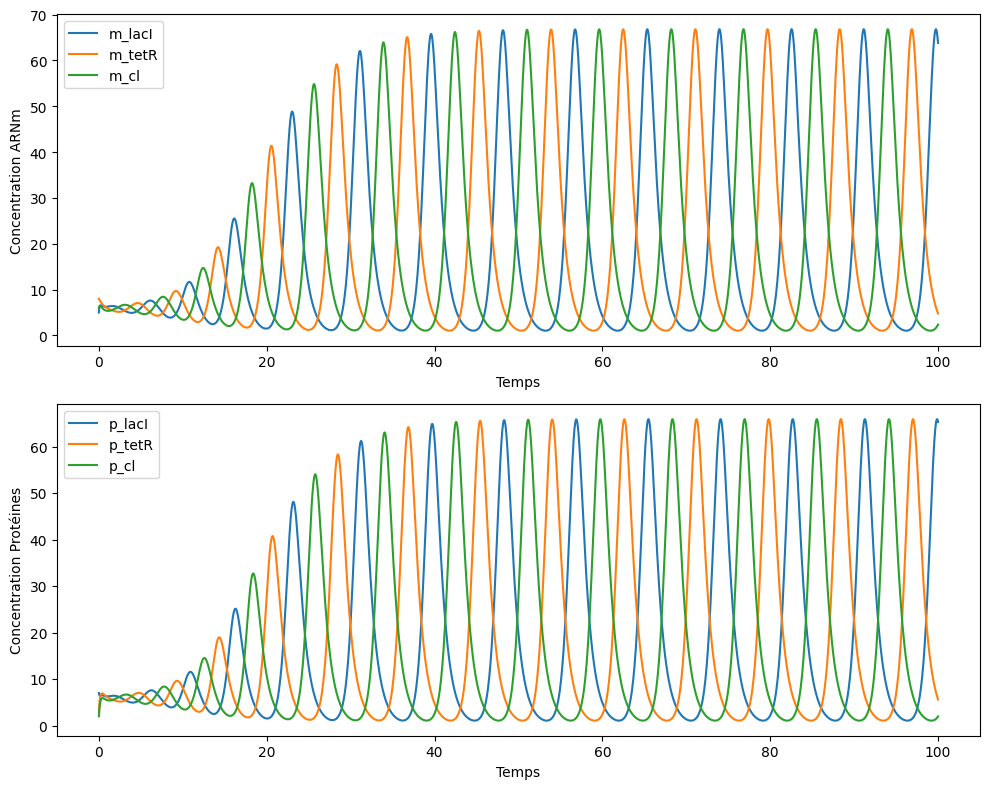

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Définition des paramètres
alphaa = 200  # taux de production d'ARNm
beta = 7      # taux de dégradation des protéines
n = 2          # coefficient de Hill
alpha0 = 0  # terme d'activation basale
Km = 40        # nombre de monomères/cellule
time_span = np.linspace(0, 100, 2000)  # intervalle de temps

# Conditions initiales
m0 = [5, 8, 6]  # concentrations initiales d'ARNm
p0 = [7, 3, 2]  # concentrations initiales de protéines

# Fonction représentant le modèle (déjà converti précédemment)
def reprissilator(y, t, alphaa, alpha0, beta, n):
    m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl = y

    # Équations différentielles
    d_m_lacI_dt = -m_lacI + (alphaa / (1 + (p_cl ** n))) + alpha0
    d_m_tetR_dt = -m_tetR + (alphaa / (1 + (p_lacI ** n))) + alpha0
    d_m_cl_dt = -m_cl + (alphaa / (1 + (p_tetR ** n))) + alpha0

    d_p_lacI_dt = -beta * (p_lacI - m_lacI)
    d_p_tetR_dt = -beta * (p_tetR - m_tetR)
    d_p_cl_dt = -beta * (p_cl - m_cl)

    return [d_m_lacI_dt, d_m_tetR_dt, d_m_cl_dt, d_p_lacI_dt, d_p_tetR_dt, d_p_cl_dt]

# Résolution des équations différentielles
y0 = m0 + p0  # Combinaison des conditions initiales ARNm et protéines
solution = odeint(reprissilator, y0, time_span, args=(alphaa, alpha0, beta, n))

# Extraction des solutions pour ARNm et protéines
m_sol = solution[:, :3]
p_sol = solution[:, 3:]

# Tracé des résultats
plt.figure(figsize=(10, 8))

# Tracé des concentrations d'ARNm
plt.subplot(2, 1, 1)
plt.plot(time_span, m_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration ARNm')
plt.legend(['m_lacI', 'm_tetR', 'm_cl'])

# Tracé des concentrations de protéines
plt.subplot(2, 1, 2)
plt.plot(time_span, p_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration Protéines')
plt.legend(['p_lacI', 'p_tetR', 'p_cl'])

plt.tight_layout()
plt.show()

2. For each parameter of the model, generate solutions for values and compared the dynamics. How each
parameter influences the amplitude, the period and the shape of the oscillations? (Hint: starting from
the parameters of the paper generated different solutions when one parameter is increased or
decreased and plot the solutions together to compared them).

ALPHA: max transcription rate

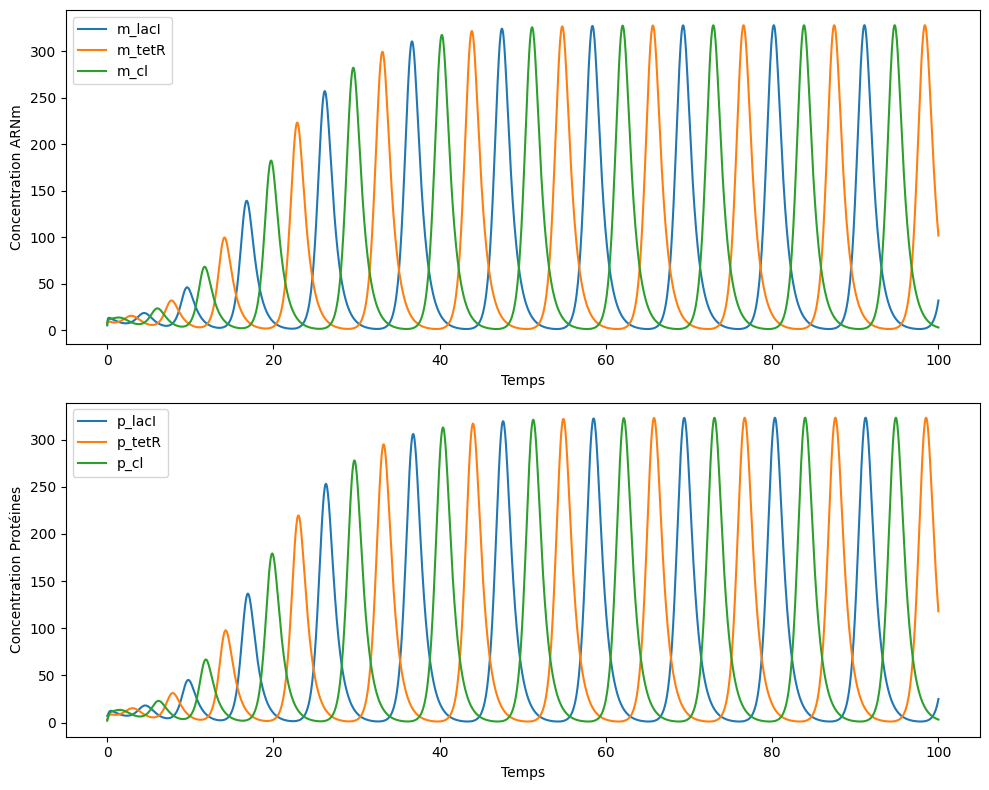

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Définition des paramètres
alphaa = 1000  # taux de production d'ARNm
beta = 7      # taux de dégradation des protéines
n = 2          # coefficient de Hill
alpha0 = 0  # terme d'activation basale
Km = 40        # nombre de monomères/cellule
time_span = np.linspace(0, 100, 2000)  # intervalle de temps

# Conditions initiales
m0 = [5, 8, 6]  # concentrations initiales d'ARNm
p0 = [7, 3, 2]  # concentrations initiales de protéines

# Fonction représentant le modèle (déjà converti précédemment)
def reprissilator(y, t, alphaa, alpha0, beta, n):
    m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl = y

    # Équations différentielles
    d_m_lacI_dt = -m_lacI + (alphaa / (1 + (p_cl ** n))) + alpha0
    d_m_tetR_dt = -m_tetR + (alphaa / (1 + (p_lacI ** n))) + alpha0
    d_m_cl_dt = -m_cl + (alphaa / (1 + (p_tetR ** n))) + alpha0

    d_p_lacI_dt = -beta * (p_lacI - m_lacI)
    d_p_tetR_dt = -beta * (p_tetR - m_tetR)
    d_p_cl_dt = -beta * (p_cl - m_cl)

    return [d_m_lacI_dt, d_m_tetR_dt, d_m_cl_dt, d_p_lacI_dt, d_p_tetR_dt, d_p_cl_dt]

# Résolution des équations différentielles
y0 = m0 + p0  # Combinaison des conditions initiales ARNm et protéines
solution = odeint(reprissilator, y0, time_span, args=(alphaa, alpha0, beta, n))

# Extraction des solutions pour ARNm et protéines
m_sol = solution[:, :3]
p_sol = solution[:, 3:]

# Tracé des résultats
plt.figure(figsize=(10, 8))

# Tracé des concentrations d'ARNm
plt.subplot(2, 1, 1)
plt.plot(time_span, m_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration ARNm')
plt.legend(['m_lacI', 'm_tetR', 'm_cl'])

# Tracé des concentrations de protéines
plt.subplot(2, 1, 2)
plt.plot(time_span, p_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration Protéines')
plt.legend(['p_lacI', 'p_tetR', 'p_cl'])

plt.tight_layout()
plt.show()

ALPHA: maximum transcription rate.
If alpha gets smaller for example 10: the oscillation is weaker and gets dampened, the amplitude decreases
-the periods get shorter
-the concentration of mRNA and protein decreases and still oscillates
-if alpha gets very very small the system will not oscillate anymore and reach the steady state


BETA:

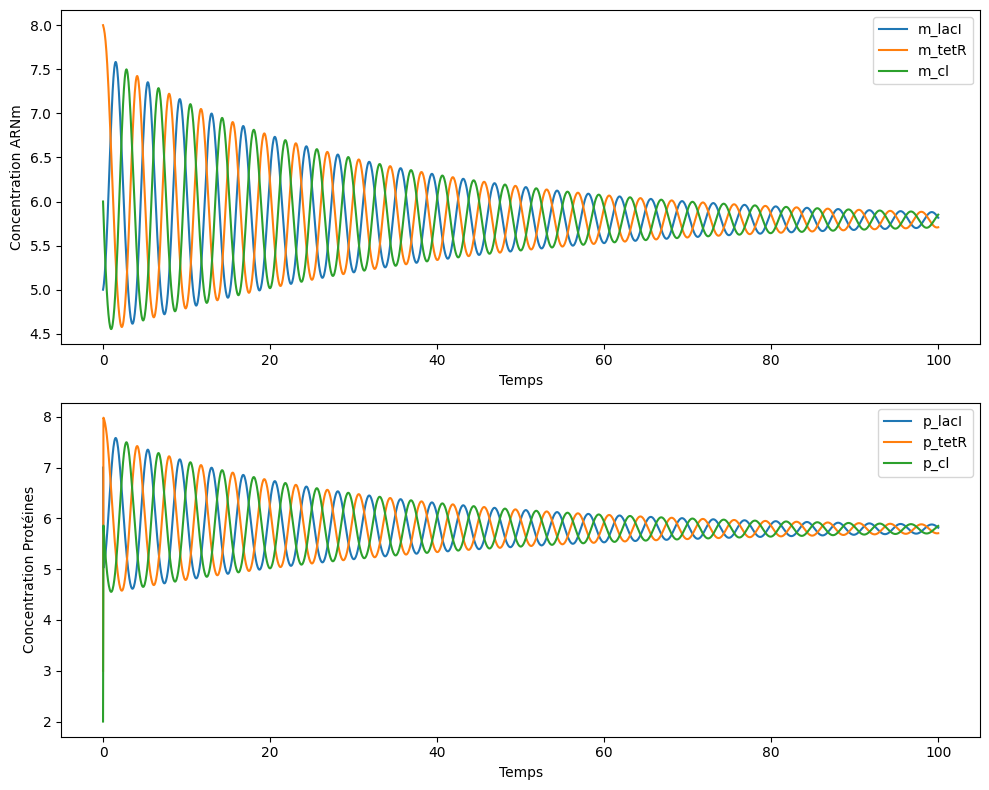

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Définition des paramètres
alphaa = 200  # taux de production d'ARNm
beta = 10000      # taux de dégradation des protéines
n = 2          # coefficient de Hill
alpha0 = 0  # terme d'activation basale
Km = 40        # nombre de monomères/cellule
time_span = np.linspace(0, 100, 2000)  # intervalle de temps

# Conditions initiales
m0 = [5, 8, 6]  # concentrations initiales d'ARNm
p0 = [7, 3, 2]  # concentrations initiales de protéines

# Fonction représentant le modèle (déjà converti précédemment)
def reprissilator(y, t, alphaa, alpha0, beta, n):
    m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl = y

    # Équations différentielles
    d_m_lacI_dt = -m_lacI + (alphaa / (1 + (p_cl ** n))) + alpha0
    d_m_tetR_dt = -m_tetR + (alphaa / (1 + (p_lacI ** n))) + alpha0
    d_m_cl_dt = -m_cl + (alphaa / (1 + (p_tetR ** n))) + alpha0

    d_p_lacI_dt = -beta * (p_lacI - m_lacI)
    d_p_tetR_dt = -beta * (p_tetR - m_tetR)
    d_p_cl_dt = -beta * (p_cl - m_cl)

    return [d_m_lacI_dt, d_m_tetR_dt, d_m_cl_dt, d_p_lacI_dt, d_p_tetR_dt, d_p_cl_dt]

# Résolution des équations différentielles
y0 = m0 + p0  # Combinaison des conditions initiales ARNm et protéines
solution = odeint(reprissilator, y0, time_span, args=(alphaa, alpha0, beta, n))

# Extraction des solutions pour ARNm et protéines
m_sol = solution[:, :3]
p_sol = solution[:, 3:]

# Tracé des résultats
plt.figure(figsize=(10, 8))

# Tracé des concentrations d'ARNm
plt.subplot(2, 1, 1)
plt.plot(time_span, m_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration ARNm')
plt.legend(['m_lacI', 'm_tetR', 'm_cl'])

# Tracé des concentrations de protéines
plt.subplot(2, 1, 2)
plt.plot(time_span, p_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration Protéines')
plt.legend(['p_lacI', 'p_tetR', 'p_cl'])

plt.tight_layout()
plt.show()

BETA: ratio between protein lifetime (degradation rate) over mRNA lifetime (degradation)
-increasing beta the protein will degrade more quickly showed by more rapid oscillations because of a shorter period
-by increasing beta we also see a reduced amplitude and going towards a steady state towards longer time

ALPHA0:basal mRNA concentration

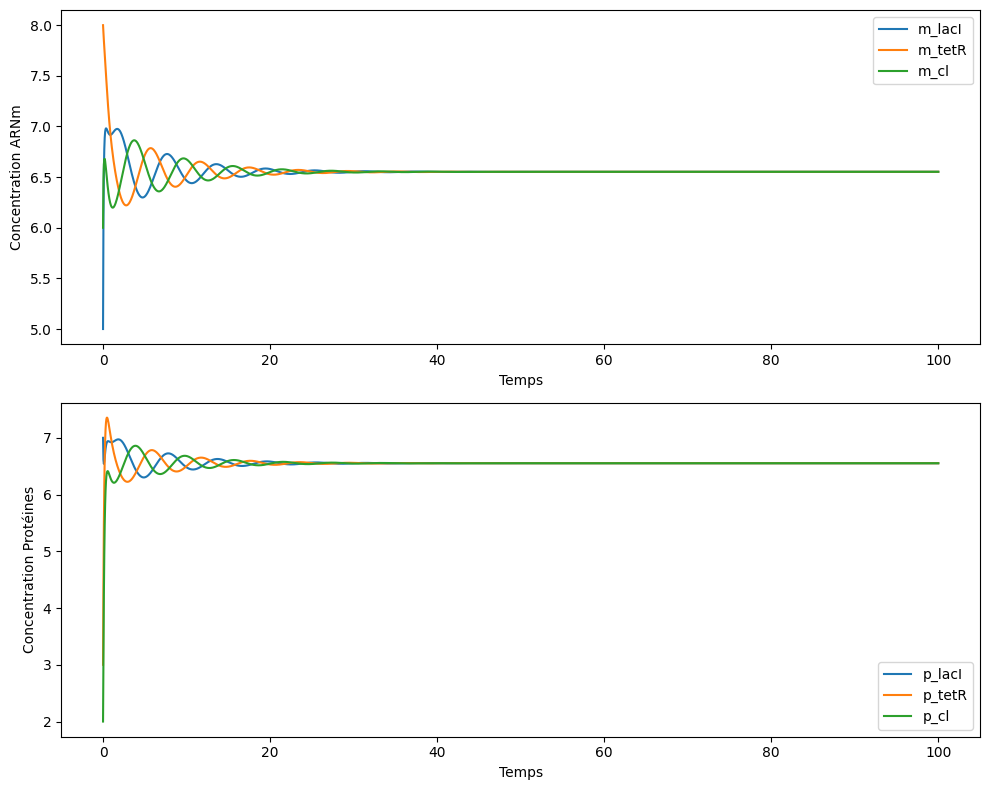

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Définition des paramètres
alphaa = 200  # taux de production d'ARNm
beta = 7      # taux de dégradation des protéines
n = 2          # coefficient de Hill
alpha0 = 2    # terme d'activation basale
Km = 40        # nombre de monomères/cellule
time_span = np.linspace(0, 100, 2000)  # intervalle de temps

# Conditions initiales
m0 = [5, 8, 6]  # concentrations initiales d'ARNm
p0 = [7, 3, 2]  # concentrations initiales de protéines

# Fonction représentant le modèle (déjà converti précédemment)
def reprissilator(y, t, alphaa, alpha0, beta, n):
    m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl = y

    # Équations différentielles
    d_m_lacI_dt = -m_lacI + (alphaa / (1 + (p_cl ** n))) + alpha0
    d_m_tetR_dt = -m_tetR + (alphaa / (1 + (p_lacI ** n))) + alpha0
    d_m_cl_dt = -m_cl + (alphaa / (1 + (p_tetR ** n))) + alpha0

    d_p_lacI_dt = -beta * (p_lacI - m_lacI)
    d_p_tetR_dt = -beta * (p_tetR - m_tetR)
    d_p_cl_dt = -beta * (p_cl - m_cl)

    return [d_m_lacI_dt, d_m_tetR_dt, d_m_cl_dt, d_p_lacI_dt, d_p_tetR_dt, d_p_cl_dt]

# Résolution des équations différentielles
y0 = m0 + p0  # Combinaison des conditions initiales ARNm et protéines
solution = odeint(reprissilator, y0, time_span, args=(alphaa, alpha0, beta, n))

# Extraction des solutions pour ARNm et protéines
m_sol = solution[:, :3]
p_sol = solution[:, 3:]

# Tracé des résultats
plt.figure(figsize=(10, 8))

# Tracé des concentrations d'ARNm
plt.subplot(2, 1, 1)
plt.plot(time_span, m_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration ARNm')
plt.legend(['m_lacI', 'm_tetR', 'm_cl'])

# Tracé des concentrations de protéines
plt.subplot(2, 1, 2)
plt.plot(time_span, p_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration Protéines')
plt.legend(['p_lacI', 'p_tetR', 'p_cl'])

plt.tight_layout()
plt.show()


ALPHA0: with increased alpha0 we have a decreased amplitude and risk of steady state without oscillations
because the repressilators cannot repress another anymore.
Transcription is not completely dependent anymore on repressors

3. What is the simplest architecture that would show oscillations? Would a single repressor that self-
represses show oscillations?

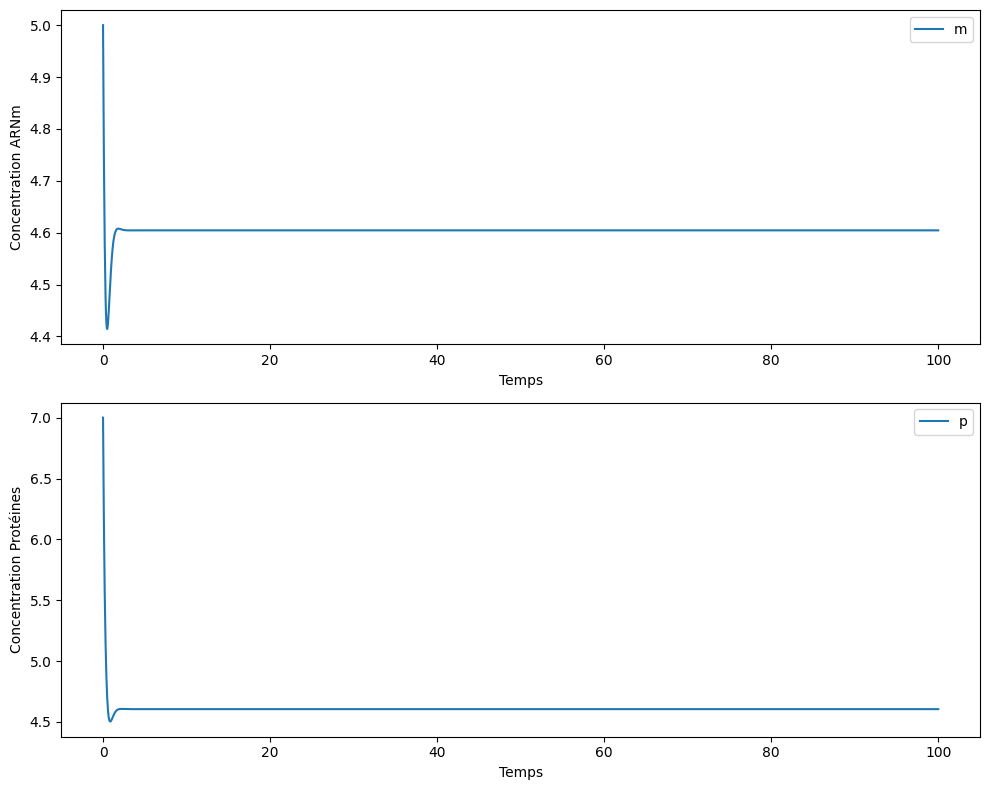

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Définition des paramètres
alphaa = 100  # taux de production d'ARNm
beta = 5      # taux de dégradation des protéines
n = 2          # coefficient de Hill
alpha0 = 0.1    # terme d'activation basale
Km = 40        # nombre de monomères/cellule
time_span = np.linspace(0, 100, 2000)  # intervalle de temps

# Conditions initiales
m0 = 5  # concentrations initiales d'ARNm
p0 = 7  # concentrations initiales de protéines

# Fonction représentant le modèle (déjà converti précédemment)
def reprissilator(y, t, alphaa, alpha0, beta, n):
    m_lacI, p_lacI = y

    # Équations différentielles
    d_m_lacI_dt = -m_lacI + (alphaa / (1 + (p_lacI ** n))) + alpha0
    d_p_lacI_dt = -beta * (p_lacI - m_lacI)

    return[d_m_lacI_dt, d_p_lacI_dt]

# Résolution des équations différentielles
y0 = [m0,p0]  # Combinaison des conditions initiales ARNm et protéines
solution = odeint(reprissilator, y0, time_span, args=(alphaa, alpha0, beta, n))

# Extraction des solutions pour ARNm et protéines
m_sol = solution[:, 0]
p_sol = solution[:, 1]

# Tracé des résultats
plt.figure(figsize=(10, 8))

# Tracé des concentrations d'ARNm
plt.subplot(2, 1, 1)
plt.plot(time_span, m_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration ARNm')
plt.legend('m_lacI')

# Tracé des concentrations de protéines
plt.subplot(2, 1, 2)
plt.plot(time_span, p_sol)
plt.xlabel('Temps')
plt.ylabel('Concentration Protéines')
plt.legend('p_lacI')

plt.tight_layout()
plt.show()

No, for a self-repressing gene, no oscillations are possible, especially if the system is very fast. Time is needed for the protein to be translated. If additional parameters such as export rate and import rate would be added it is possible to obtain a oscillating system but not in this case where transcription, translation and binding to the target DNA is quite fast.

The minimal architecture to obtain an oscillating system with one self-repressing gene would be time delay, a non-linear repression (Hill function with a high Hill coefficient) for cooperativity. Also, degradation Rates need to be rapid to allow oscillations by preventing accumulation that could stabilize the system.

Achieving oscillations with two genes repressing each other should be possible also taking into account, time delay, balanced transcription and degradation rates and an appropriate Hill coefficient.


**Part III: Solving the stochastic model**
1. Implement the Gillespie algorithm to simulate stochastic trajectories of a gene that represses itself.
Model mRNA and protein production: Ga -> M -> P. The repression can be modeled as 2P + Ga -> Gi.

The Gillespie algorithm is a computational method used to simulate the time evolution of a system of reactions where the reactions occur in a stochastic manner.

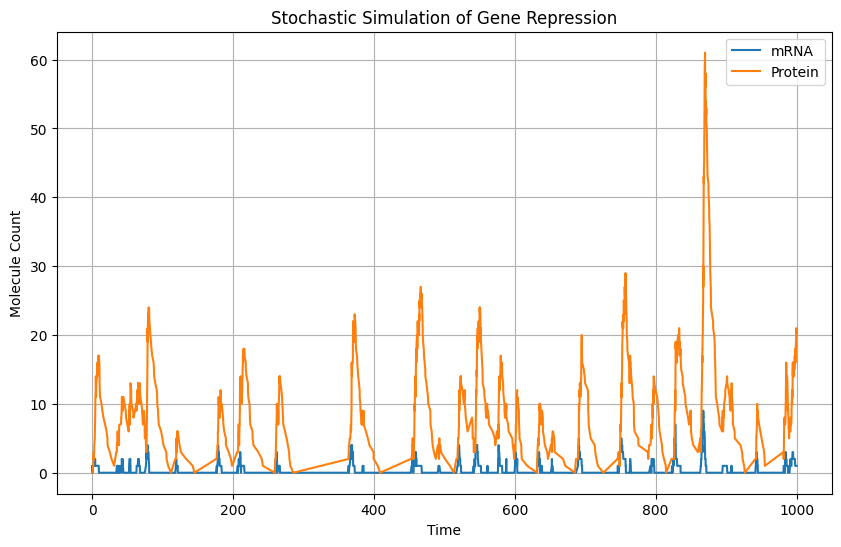

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k_transcription = 1.0   # Rate of mRNA production (Ga -> M)
k_translation = 2.0     # Rate of protein production (M -> P)
k_mRNA_decay = 0.5      # Rate of mRNA degradation (M -> 0)
k_protein_decay = 0.1   # Rate of protein degradation (P -> 0)
k_repression = 0.01     # Rate of repression (2P + Ga -> Gi)
k_derepression = 0.05   # Rate of derepression (Gi -> Ga)

# Define species indices
species = ["Ga", "Gi", "M", "P"]

# Initial state
S0 = np.array([1, 0, 0, 0])  # [Ga, Gi, M, P]

# Reaction matrix (Q)
Q = np.array([
    [0, 0, 1, 0],  # Ga -> Ga + M
    [0, 0, 0, 1],  # M -> M + P
    [0, 0, -1, 0], # M -> 0
    [0, 0, 0, -1], # P -> 0
    [-1, 1, 0, -2], # 2P + Ga -> Gi
    [1, -1, 0, 2]   # Gi -> Ga + 2P
])

def get_prop(S):
    """Compute reaction propensities."""
    Ga, Gi, M, P = S
    return np.abs(np.array([
        k_transcription * Ga,              # Ga -> Ga + M
        k_translation * M,                 # M -> M + P
        k_mRNA_decay * M,                  # M -> 0
        k_protein_decay * P,               # P -> 0
        k_repression * Ga * P * (P - 1) / 2, # 2P + Ga -> Gi
        k_derepression * Gi               # Gi -> Ga
    ]))

def gillespie(S0, max_time):
    """Simulate using the Gillespie algorithm."""
    S = S0.copy()  # Initialize system state
    time = 0
    times = [time]
    states = [S.copy()]

    while time < max_time:
        P = get_prop(S)  # Calculate propensities

        # Handle zero propensities to avoid division by zero
        P = np.maximum(P, 1e-10)  # Replace zero with a small value

        # Reaction times
        T = np.random.exponential(1 / P, size=len(P))
        i = np.argmin(T)  # Reaction with the smallest time
        dt = T[i]

        # Update system state
        S = S + Q[i]
        if np.sum(S<0)>0:
          Print("Negative specie")
        # Update time and record state
        time += dt
        times.append(time)
        states.append(S.copy())

    return times, np.array(states)

# Run simulation
max_time = 1000
times, states = gillespie(S0, max_time)

# Extract mRNA and protein counts
mRNA_counts = states[:, 2]  # M column
protein_counts = states[:, 3]  # P column

# Plot results  Add active gene Ga in the plot
plt.figure(figsize=(10, 6))
plt.plot(times, mRNA_counts, label="mRNA", alpha=1)
plt.plot(times, protein_counts, label="Protein", alpha=1)
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Stochastic Simulation of Gene Repression")
plt.legend()
plt.grid()
plt.show()





2. Extend the previous model to three genes to simulate the repressilator.


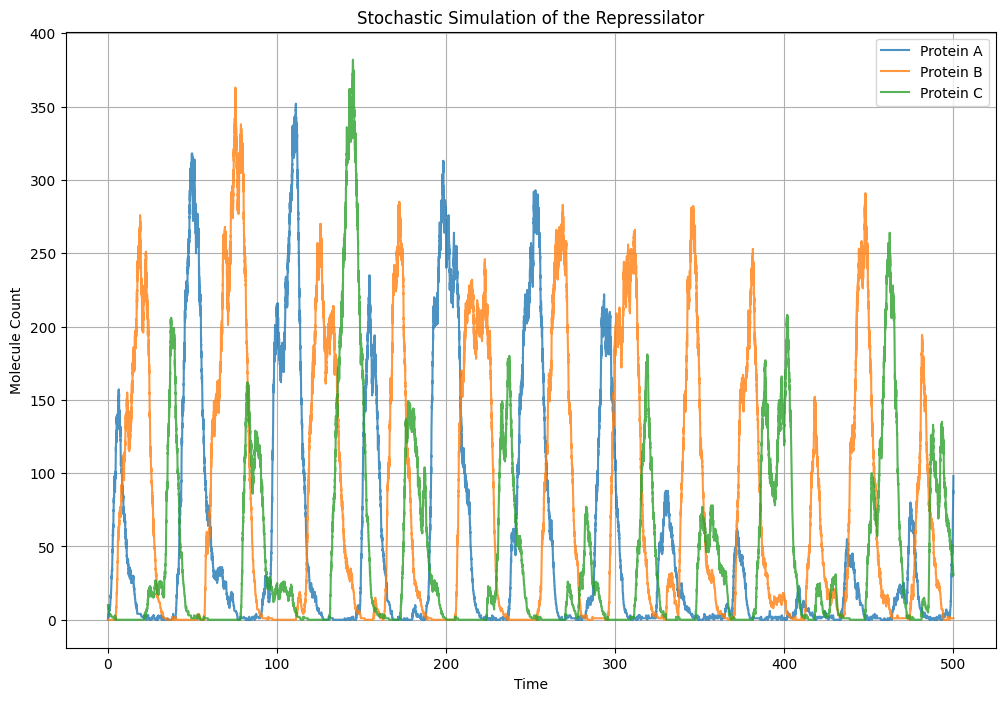

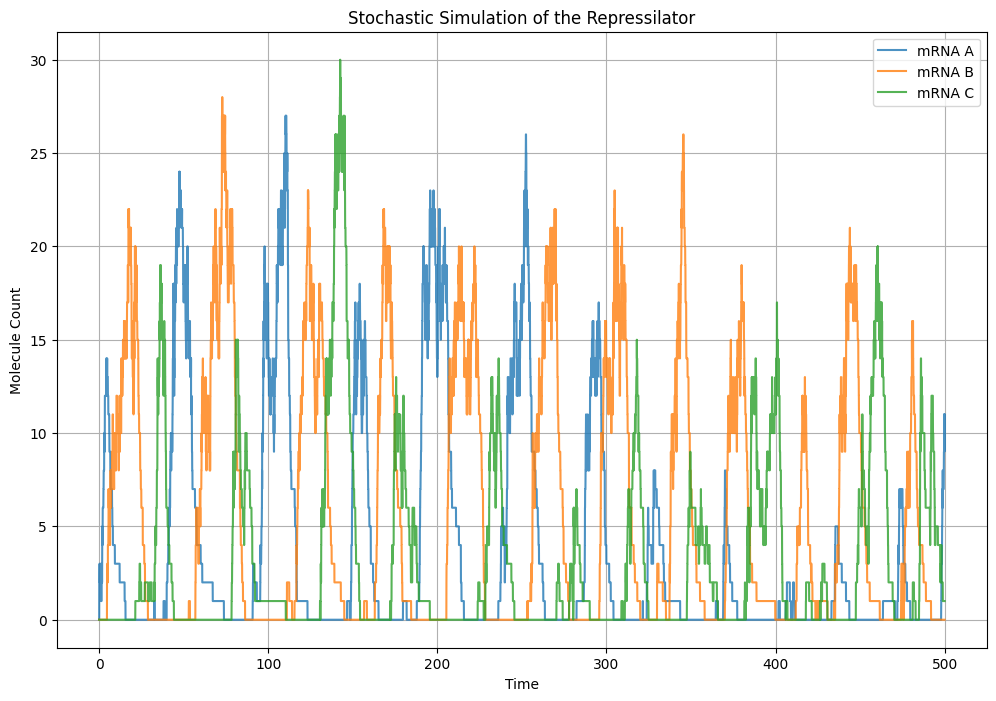

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Parameters
k_transcription = 5   # Rate of mRNA production (Gi -> M)
k_translation = 10     # Rate of protein production (M -> P)
k_mRNA_decay = 0.3      # Rate of mRNA degradation (M -> 0)
k_protein_decay = 0.7    # Rate of protein degradation (P -> 0)
k_repression = 0.7     # Rate of repression (P -> Gi)
n= 2 #hill coefficient
# Define species indices
species = ["Ga", "Gi_a", "Gb", "Gi_b", "Gc", "Gi_c", "Ma", "Pa", "Mb", "Pb", "Mc", "Pc"]

# Initial state
S0 = np.array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 10])  # [Ga, Gi_a, Gb, Gi_b, Gc, Gi_c, Ma, Pa, Mb, Pb, Mc, Pc]

# Reaction matrix (Q)
Q = np.array([
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],   # Ga -> Ga + Ma
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],   # Ma -> Ma + Pa
    [0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0],  # Ma -> 0
    [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0],  # Pa -> 0
    [-1, 1, 0, 0, 0, 0, 0, 0, 0, -n, 0, 0], # Pb + Ga -> Gi_a
    [1, -1, 0, 0, 0, 0, 0, 0, 0, n, 0, 0],  # Gi_a -> Ga + Pb

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],   # Gb -> Gb + Mb
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],   # Mb -> Mb + Pb
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0],  # Mb -> 0
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0],  # Pb -> 0
    [0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, -n], # Pc + Gb -> Gi_b
    [0, 0, 1, -1, 0, 0, 0, 1, 0, 0, 0, n],  # Gi_b -> Gb + Pc

    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],   # Gc -> Gc + Mc
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],   # Mc -> Mc + Pc
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0],  # Mc -> 0
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1],  # Pc -> 0
    [0, 0, 0, 0, -1, 1, 0, -n, 0, 0, 0, 0], # Pa + Gc -> Gi_c
    [0, 0, 0, 0, 1, -1, 0, n, 0, 0, 0, 0]   # Gi_c -> Gc + Pa
])
#function to integrate n
def inter(n, P):
    prod = 1  # Initialize the product variable
    for i in range(n):
        prod = prod * (P - i)

    return prod

# Function to compute reaction propensities
def get_prop(S):
    Ga, Gi_a, Gb, Gi_b, Gc, Gi_c, Ma, Pa, Mb, Pb, Mc, Pc = S
    return np.abs(np.array([
        k_transcription * Ga,              # Ga -> Ga + Ma
        k_translation * Ma,               # Ma -> Ma + Pa
        k_mRNA_decay * Ma,                # Ma -> 0
        k_protein_decay * Pa,             # Pa -> 0
        k_repression * Ga * inter(n,Pb),  # Pb + Ga -> Gi_a
        k_repression * Gi_a,              # Gi_a -> Ga + Pb

        k_transcription * Gb,             # Gb -> Gb + Mb
        k_translation * Mb,               # Mb -> Mb + Pb
        k_mRNA_decay * Mb,                # Mb -> 0
        k_protein_decay * Pb,             # Pb -> 0
        k_repression * Gb * inter(n,Pc),  # Pc + Gb -> Gi_b
        k_repression * Gi_b,              # Gi_b -> Gb + Pc

        k_transcription * Gc,             # Gc -> Gc + Mc
        k_translation * Mc,               # Mc -> Mc + Pc
        k_mRNA_decay * Mc,                # Mc -> 0
        k_protein_decay * Pc,             # Pc -> 0
        k_repression * Gc * inter(n,Pa),  # Pa + Gc -> Gi_c
        k_repression * Gi_c               # Gi_c -> Gc + Pa
    ]))

# Gillespie simulation function
def gillespie(S0, max_time):
    S = S0.copy()  # Initialize system state
    time = 0
    times = [time]
    states = [S.copy()]

    while time < max_time:
        P = get_prop(S)  # Calculate propensities

        # Handle zero propensities to avoid division by zero
        P = np.maximum(P, 1e-10)  # Replace zero with a small value

        # Reaction times
        T = np.random.exponential(1 / P, size=len(P))
        i = np.argmin(T)  # Reaction with the smallest time
        dt = T[i]

        # Update system state
        S = S + Q[i]
        if np.sum(S<0)>0:
          print("Negative specie")

        # Update time and record state
        time += dt
        times.append(time)
        states.append(S.copy())

    return times, np.array(states)

# Run simulation
max_time = 500
times, states = gillespie(S0, max_time)

# Extract molecule counts for plotting
mRNA_counts_a = states[:, 6]  # Ma column
protein_counts_a = states[:, 7]  # Pa column
mRNA_counts_b = states[:, 8]  # Mb column
protein_counts_b = states[:, 9]  # Pb column
mRNA_counts_c = states[:, 10]  # Mc column
protein_counts_c = states[:, 11]  # Pc column

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(times, protein_counts_a, label="Protein A", alpha=0.8)
plt.plot(times, protein_counts_b, label="Protein B", alpha=0.8)
plt.plot(times, protein_counts_c, label="Protein C", alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Stochastic Simulation of the Repressilator")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(times, mRNA_counts_a, label="mRNA A", alpha=0.8)
plt.plot(times, mRNA_counts_b, label="mRNA B", alpha=0.8)
plt.plot(times, mRNA_counts_c, label="mRNA C", alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Stochastic Simulation of the Repressilator")
plt.legend()
plt.grid()
plt.show()


3. Choose different parameter regimes that lead to different mean molecule numbers in the system and
evaluate what happens with the oscillations compared to the deterministic model in part II

- increase transcription and translation rate:

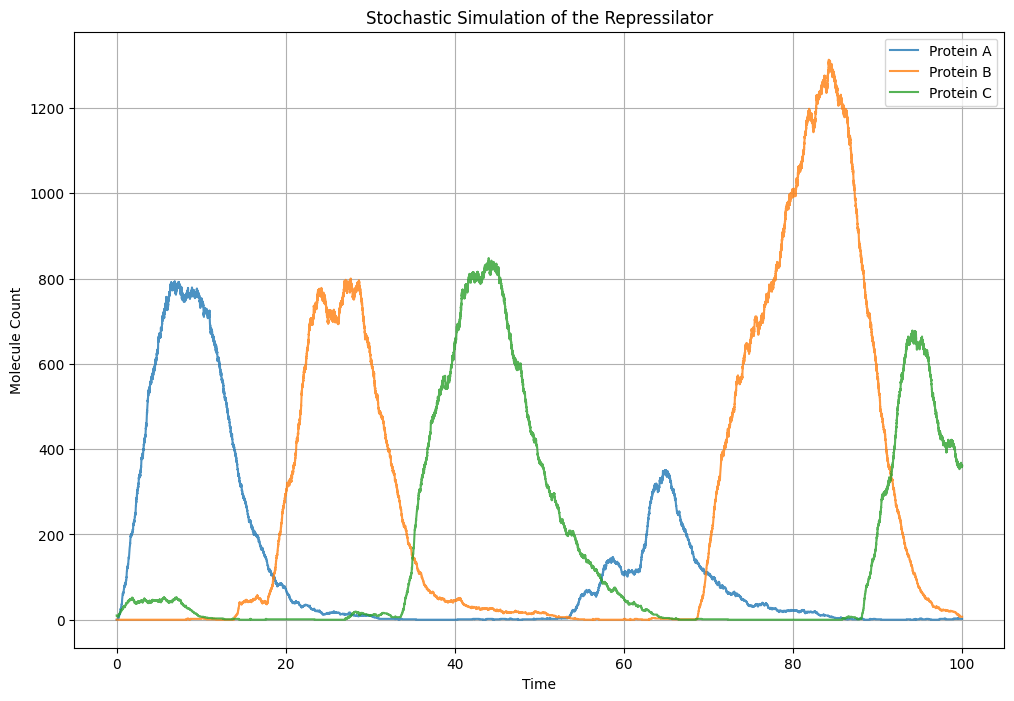

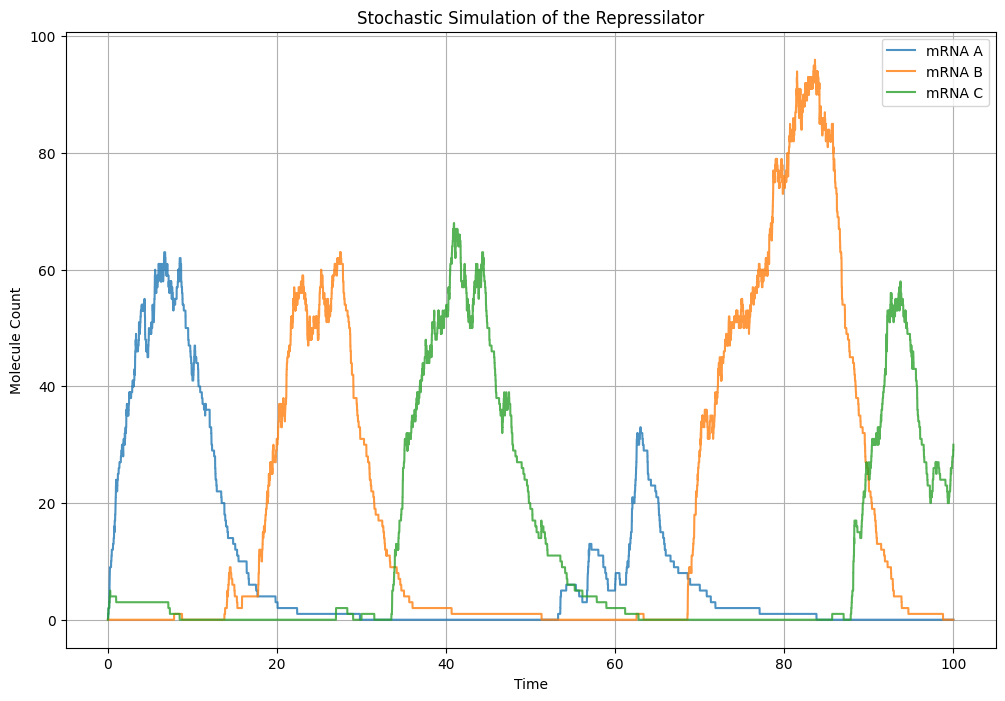

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Parameters
k_transcription = 20   # Rate of mRNA production (Gi -> M)
k_translation = 10     # Rate of protein production (M -> P)
k_mRNA_decay = 0.3      # Rate of mRNA degradation (M -> 0)
k_protein_decay = 0.7    # Rate of protein degradation (P -> 0)
k_repression = 0.7     # Rate of repression (P -> Gi)
n= 2 #hill coefficient
# Define species indices
species = ["Ga", "Gi_a", "Gb", "Gi_b", "Gc", "Gi_c", "Ma", "Pa", "Mb", "Pb", "Mc", "Pc"]

# Initial state
S0 = np.array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 10])  # [Ga, Gi_a, Gb, Gi_b, Gc, Gi_c, Ma, Pa, Mb, Pb, Mc, Pc]

# Reaction matrix (Q)
Q = np.array([
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],   # Ga -> Ga + Ma
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],   # Ma -> Ma + Pa
    [0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0],  # Ma -> 0
    [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0],  # Pa -> 0
    [-1, 1, 0, 0, 0, 0, 0, 0, 0, -n, 0, 0], # Pb + Ga -> Gi_a
    [1, -1, 0, 0, 0, 0, 0, 0, 0, n, 0, 0],  # Gi_a -> Ga + Pb

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],   # Gb -> Gb + Mb
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],   # Mb -> Mb + Pb
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0],  # Mb -> 0
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0],  # Pb -> 0
    [0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, -n], # Pc + Gb -> Gi_b
    [0, 0, 1, -1, 0, 0, 0, 1, 0, 0, 0, n],  # Gi_b -> Gb + Pc

    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],   # Gc -> Gc + Mc
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],   # Mc -> Mc + Pc
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0],  # Mc -> 0
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1],  # Pc -> 0
    [0, 0, 0, 0, -1, 1, 0, -n, 0, 0, 0, 0], # Pa + Gc -> Gi_c
    [0, 0, 0, 0, 1, -1, 0, n, 0, 0, 0, 0]   # Gi_c -> Gc + Pa
])
#function to integrate n
def inter(n, P):
    prod = 1  # Initialize the product variable
    for i in range(n):
        prod = prod * (P - i)

    return prod

# Function to compute reaction propensities
def get_prop(S):
    Ga, Gi_a, Gb, Gi_b, Gc, Gi_c, Ma, Pa, Mb, Pb, Mc, Pc = S
    return np.abs(np.array([
        k_transcription * Ga,              # Ga -> Ga + Ma
        k_translation * Ma,               # Ma -> Ma + Pa
        k_mRNA_decay * Ma,                # Ma -> 0
        k_protein_decay * Pa,             # Pa -> 0
        k_repression * Ga * inter(n,Pb),  # Pb + Ga -> Gi_a
        k_repression * Gi_a,              # Gi_a -> Ga + Pb

        k_transcription * Gb,             # Gb -> Gb + Mb
        k_translation * Mb,               # Mb -> Mb + Pb
        k_mRNA_decay * Mb,                # Mb -> 0
        k_protein_decay * Pb,             # Pb -> 0
        k_repression * Gb * inter(n,Pc),  # Pc + Gb -> Gi_b
        k_repression * Gi_b,              # Gi_b -> Gb + Pc

        k_transcription * Gc,             # Gc -> Gc + Mc
        k_translation * Mc,               # Mc -> Mc + Pc
        k_mRNA_decay * Mc,                # Mc -> 0
        k_protein_decay * Pc,             # Pc -> 0
        k_repression * Gc * inter(n,Pa),  # Pa + Gc -> Gi_c
        k_repression * Gi_c               # Gi_c -> Gc + Pa
    ]))

# Gillespie simulation function
def gillespie(S0, max_time):
    S = S0.copy()  # Initialize system state
    time = 0
    times = [time]
    states = [S.copy()]

    while time < max_time:
        P = get_prop(S)  # Calculate propensities

        # Handle zero propensities to avoid division by zero
        P = np.maximum(P, 1e-10)  # Replace zero with a small value

        # Reaction times
        T = np.random.exponential(1 / P, size=len(P))
        i = np.argmin(T)  # Reaction with the smallest time
        dt = T[i]

        # Update system state
        S = S + Q[i]
        if np.sum(S<0)>0:
          print("Negative specie")

        # Update time and record state
        time += dt
        times.append(time)
        states.append(S.copy())

    return times, np.array(states)

# Run simulation
max_time = 100
times, states = gillespie(S0, max_time)

# Extract molecule counts for plotting
mRNA_counts_a = states[:, 6]  # Ma column
protein_counts_a = states[:, 7]  # Pa column
mRNA_counts_b = states[:, 8]  # Mb column
protein_counts_b = states[:, 9]  # Pb column
mRNA_counts_c = states[:, 10]  # Mc column
protein_counts_c = states[:, 11]  # Pc column

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(times, protein_counts_a, label="Protein A", alpha=0.8)
plt.plot(times, protein_counts_b, label="Protein B", alpha=0.8)
plt.plot(times, protein_counts_c, label="Protein C", alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Stochastic Simulation of the Repressilator")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(times, mRNA_counts_a, label="mRNA A", alpha=0.8)
plt.plot(times, mRNA_counts_b, label="mRNA B", alpha=0.8)
plt.plot(times, mRNA_counts_c, label="mRNA C", alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Stochastic Simulation of the Repressilator")
plt.legend()
plt.grid()
plt.show()


Oscillations differ --> only two proteins oscillate other no
molecule number increased ten fold by increasing transcription rate and translation rate 4-fold
-as protein C has initial protein amount of 10 whereas the others are 0 this might skew the results leading in less expression of protein A. Because of the stochastic nature of the system also small changes in initial conditions can induce great changes throughout the simulation.
- as in the determinsitic model the period gets bigger and the amplitude increases with increasing trasncription and translation rate

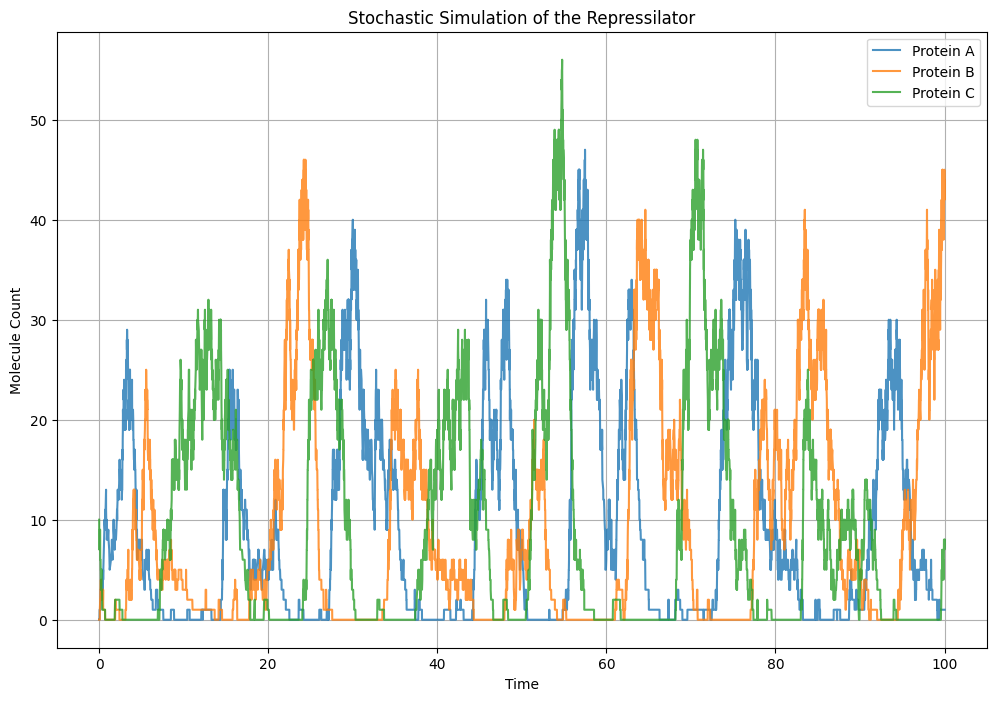

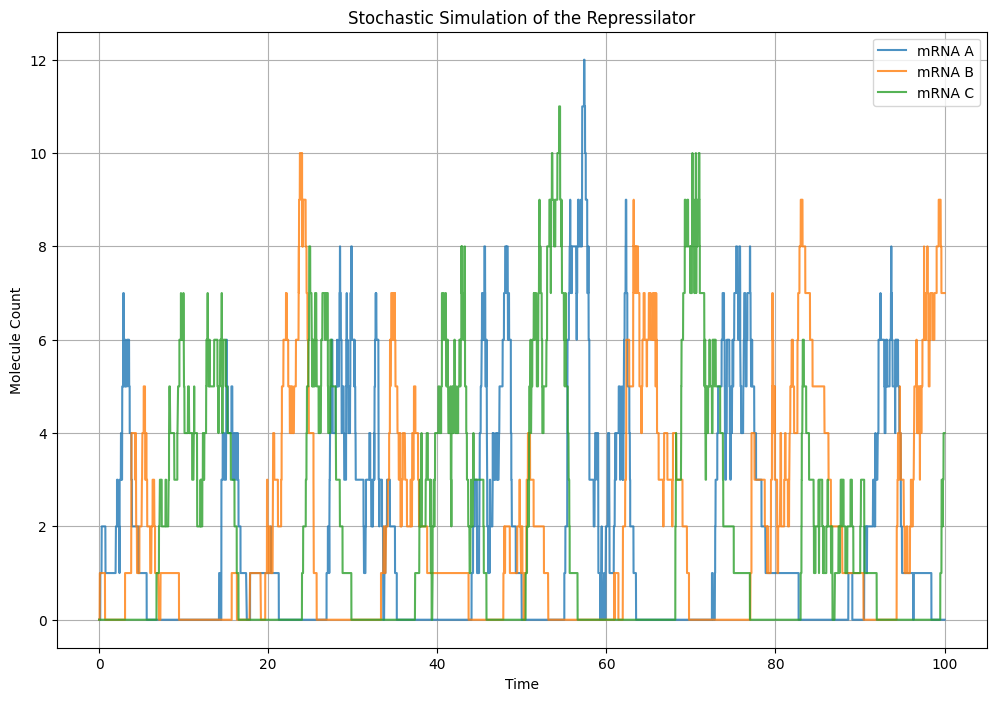

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Parameters
k_transcription = 5   # Rate of mRNA production (Gi -> M)
k_translation = 10     # Rate of protein production (M -> P)
k_mRNA_decay = 1     # Rate of mRNA degradation (M -> 0)
k_protein_decay = 2    # Rate of protein degradation (P -> 0)
k_repression = 0.7     # Rate of repression (P -> Gi)
n= 2 #hill coefficient
# Define species indices
species = ["Ga", "Gi_a", "Gb", "Gi_b", "Gc", "Gi_c", "Ma", "Pa", "Mb", "Pb", "Mc", "Pc"]

# Initial state
S0 = np.array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 10])  # [Ga, Gi_a, Gb, Gi_b, Gc, Gi_c, Ma, Pa, Mb, Pb, Mc, Pc]

# Reaction matrix (Q)
Q = np.array([
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],   # Ga -> Ga + Ma
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],   # Ma -> Ma + Pa
    [0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0],  # Ma -> 0
    [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0],  # Pa -> 0
    [-1, 1, 0, 0, 0, 0, 0, 0, 0, -n, 0, 0], # Pb + Ga -> Gi_a
    [1, -1, 0, 0, 0, 0, 0, 0, 0, n, 0, 0],  # Gi_a -> Ga + Pb

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],   # Gb -> Gb + Mb
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],   # Mb -> Mb + Pb
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0],  # Mb -> 0
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0],  # Pb -> 0
    [0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, -n], # Pc + Gb -> Gi_b
    [0, 0, 1, -1, 0, 0, 0, 1, 0, 0, 0, n],  # Gi_b -> Gb + Pc

    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],   # Gc -> Gc + Mc
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],   # Mc -> Mc + Pc
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0],  # Mc -> 0
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1],  # Pc -> 0
    [0, 0, 0, 0, -1, 1, 0, -n, 0, 0, 0, 0], # Pa + Gc -> Gi_c
    [0, 0, 0, 0, 1, -1, 0, n, 0, 0, 0, 0]   # Gi_c -> Gc + Pa
])
#function to integrate n
def inter(n, P):
    prod = 1  # Initialize the product variable
    for i in range(n):
        prod = prod * (P - i)

    return prod

# Function to compute reaction propensities
def get_prop(S):
    Ga, Gi_a, Gb, Gi_b, Gc, Gi_c, Ma, Pa, Mb, Pb, Mc, Pc = S
    return np.abs(np.array([
        k_transcription * Ga,              # Ga -> Ga + Ma
        k_translation * Ma,               # Ma -> Ma + Pa
        k_mRNA_decay * Ma,                # Ma -> 0
        k_protein_decay * Pa,             # Pa -> 0
        k_repression * Ga * inter(n,Pb),  # Pb + Ga -> Gi_a
        k_repression * Gi_a,              # Gi_a -> Ga + Pb

        k_transcription * Gb,             # Gb -> Gb + Mb
        k_translation * Mb,               # Mb -> Mb + Pb
        k_mRNA_decay * Mb,                # Mb -> 0
        k_protein_decay * Pb,             # Pb -> 0
        k_repression * Gb * inter(n,Pc),  # Pc + Gb -> Gi_b
        k_repression * Gi_b,              # Gi_b -> Gb + Pc

        k_transcription * Gc,             # Gc -> Gc + Mc
        k_translation * Mc,               # Mc -> Mc + Pc
        k_mRNA_decay * Mc,                # Mc -> 0
        k_protein_decay * Pc,             # Pc -> 0
        k_repression * Gc * inter(n,Pa),  # Pa + Gc -> Gi_c
        k_repression * Gi_c               # Gi_c -> Gc + Pa
    ]))

# Gillespie simulation function
def gillespie(S0, max_time):
    S = S0.copy()  # Initialize system state
    time = 0
    times = [time]
    states = [S.copy()]

    while time < max_time:
        P = get_prop(S)  # Calculate propensities

        # Handle zero propensities to avoid division by zero
        P = np.maximum(P, 1e-10)  # Replace zero with a small value

        # Reaction times
        T = np.random.exponential(1 / P, size=len(P))
        i = np.argmin(T)  # Reaction with the smallest time
        dt = T[i]

        # Update system state
        S = S + Q[i]
        if np.sum(S<0)>0:
          print("Negative specie")

        # Update time and record state
        time += dt
        times.append(time)
        states.append(S.copy())

    return times, np.array(states)

# Run simulation
max_time = 100
times, states = gillespie(S0, max_time)

# Extract molecule counts for plotting
mRNA_counts_a = states[:, 6]  # Ma column
protein_counts_a = states[:, 7]  # Pa column
mRNA_counts_b = states[:, 8]  # Mb column
protein_counts_b = states[:, 9]  # Pb column
mRNA_counts_c = states[:, 10]  # Mc column
protein_counts_c = states[:, 11]  # Pc column

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(times, protein_counts_a, label="Protein A", alpha=0.8)
plt.plot(times, protein_counts_b, label="Protein B", alpha=0.8)
plt.plot(times, protein_counts_c, label="Protein C", alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Stochastic Simulation of the Repressilator")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(times, mRNA_counts_a, label="mRNA A", alpha=0.8)
plt.plot(times, mRNA_counts_b, label="mRNA B", alpha=0.8)
plt.plot(times, mRNA_counts_c, label="mRNA C", alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Stochastic Simulation of the Repressilator")
plt.legend()
plt.grid()
plt.show()


By increasing mRNA and protein decay the period, so the time between oscillations, becomes much smaller. Subsequently also the number of molecules will be decreased. This aligns with the expecations as the turnover of protein will be much faster than before.
-however the system does not go towards a steady state as in the determinsitic model. The stochasticity accounts for this difference.

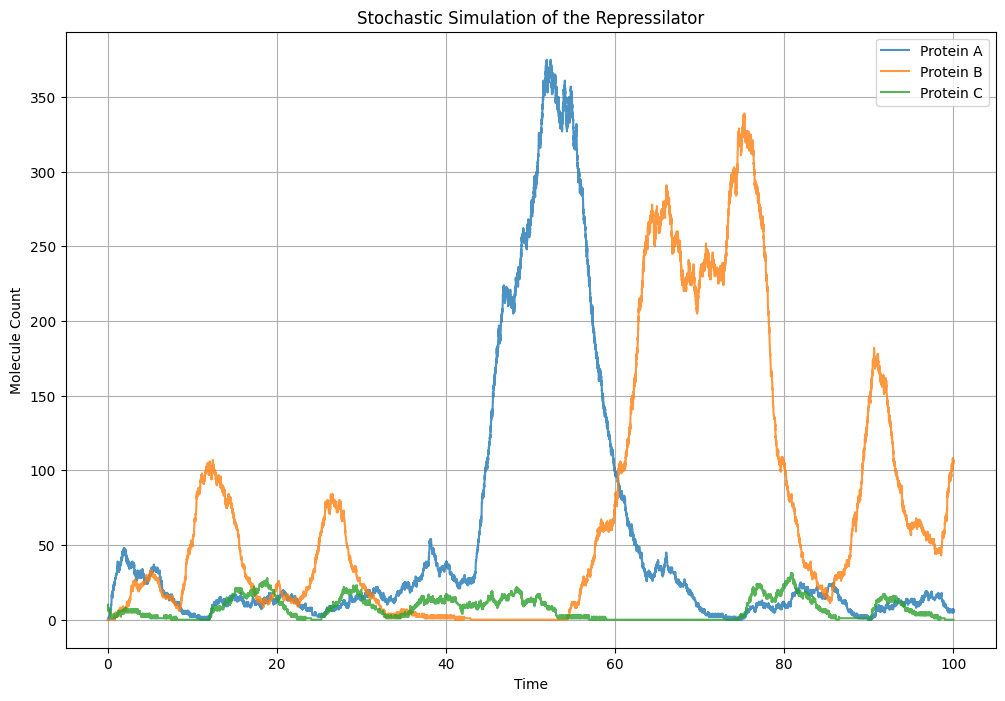

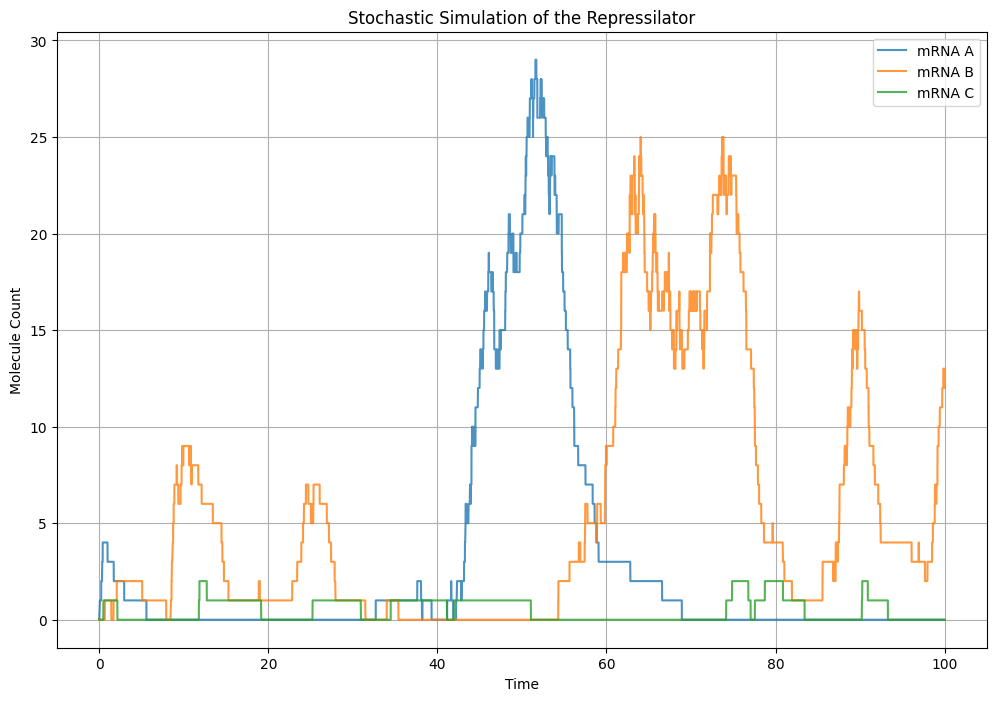

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Parameters
k_transcription = 5   # Rate of mRNA production (Gi -> M)
k_translation = 10     # Rate of protein production (M -> P)
k_mRNA_decay = 0.3     # Rate of mRNA degradation (M -> 0)
k_protein_decay = 0.7    # Rate of protein degradation (P -> 0)
k_repression = 10  # Rate of repression (P -> Gi)
n= 2 #hill coefficient
# Define species indices
species = ["Ga", "Gi_a", "Gb", "Gi_b", "Gc", "Gi_c", "Ma", "Pa", "Mb", "Pb", "Mc", "Pc"]

# Initial state
S0 = np.array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 10])  # [Ga, Gi_a, Gb, Gi_b, Gc, Gi_c, Ma, Pa, Mb, Pb, Mc, Pc]

# Reaction matrix (Q)
Q = np.array([
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],   # Ga -> Ga + Ma
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],   # Ma -> Ma + Pa
    [0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0],  # Ma -> 0
    [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0],  # Pa -> 0
    [-1, 1, 0, 0, 0, 0, 0, 0, 0, -n, 0, 0], # Pb + Ga -> Gi_a
    [1, -1, 0, 0, 0, 0, 0, 0, 0, n, 0, 0],  # Gi_a -> Ga + Pb

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],   # Gb -> Gb + Mb
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],   # Mb -> Mb + Pb
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0],  # Mb -> 0
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0],  # Pb -> 0
    [0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, -n], # Pc + Gb -> Gi_b
    [0, 0, 1, -1, 0, 0, 0, 1, 0, 0, 0, n],  # Gi_b -> Gb + Pc

    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],   # Gc -> Gc + Mc
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],   # Mc -> Mc + Pc
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0],  # Mc -> 0
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1],  # Pc -> 0
    [0, 0, 0, 0, -1, 1, 0, -n, 0, 0, 0, 0], # Pa + Gc -> Gi_c
    [0, 0, 0, 0, 1, -1, 0, n, 0, 0, 0, 0]   # Gi_c -> Gc + Pa
])
#function to integrate n
def inter(n, P):
    prod = 1  # Initialize the product variable
    for i in range(n):
        prod = prod * (P - i)

    return prod

# Function to compute reaction propensities
def get_prop(S):
    Ga, Gi_a, Gb, Gi_b, Gc, Gi_c, Ma, Pa, Mb, Pb, Mc, Pc = S
    return np.abs(np.array([
        k_transcription * Ga,              # Ga -> Ga + Ma
        k_translation * Ma,               # Ma -> Ma + Pa
        k_mRNA_decay * Ma,                # Ma -> 0
        k_protein_decay * Pa,             # Pa -> 0
        k_repression * Ga * inter(n,Pb),  # Pb + Ga -> Gi_a
        k_repression * Gi_a,              # Gi_a -> Ga + Pb

        k_transcription * Gb,             # Gb -> Gb + Mb
        k_translation * Mb,               # Mb -> Mb + Pb
        k_mRNA_decay * Mb,                # Mb -> 0
        k_protein_decay * Pb,             # Pb -> 0
        k_repression * Gb * inter(n,Pc),  # Pc + Gb -> Gi_b
        k_repression * Gi_b,              # Gi_b -> Gb + Pc

        k_transcription * Gc,             # Gc -> Gc + Mc
        k_translation * Mc,               # Mc -> Mc + Pc
        k_mRNA_decay * Mc,                # Mc -> 0
        k_protein_decay * Pc,             # Pc -> 0
        k_repression * Gc * inter(n,Pa),  # Pa + Gc -> Gi_c
        k_repression * Gi_c               # Gi_c -> Gc + Pa
    ]))

# Gillespie simulation function
def gillespie(S0, max_time):
    S = S0.copy()  # Initialize system state
    time = 0
    times = [time]
    states = [S.copy()]

    while time < max_time:
        P = get_prop(S)  # Calculate propensities

        # Handle zero propensities to avoid division by zero
        P = np.maximum(P, 1e-10)  # Replace zero with a small value

        # Reaction times
        T = np.random.exponential(1 / P, size=len(P))
        i = np.argmin(T)  # Reaction with the smallest time
        dt = T[i]

        # Update system state
        S = S + Q[i]
        if np.sum(S<0)>0:
          print("Negative specie")

        # Update time and record state
        time += dt
        times.append(time)
        states.append(S.copy())

    return times, np.array(states)

# Run simulation
max_time = 100
times, states = gillespie(S0, max_time)

# Extract molecule counts for plotting
mRNA_counts_a = states[:, 6]  # Ma column
protein_counts_a = states[:, 7]  # Pa column
mRNA_counts_b = states[:, 8]  # Mb column
protein_counts_b = states[:, 9]  # Pb column
mRNA_counts_c = states[:, 10]  # Mc column
protein_counts_c = states[:, 11]  # Pc column

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(times, protein_counts_a, label="Protein A", alpha=0.8)
plt.plot(times, protein_counts_b, label="Protein B", alpha=0.8)
plt.plot(times, protein_counts_c, label="Protein C", alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Stochastic Simulation of the Repressilator")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(times, mRNA_counts_a, label="mRNA A", alpha=0.8)
plt.plot(times, mRNA_counts_b, label="mRNA B", alpha=0.8)
plt.plot(times, mRNA_counts_c, label="mRNA C", alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Stochastic Simulation of the Repressilator")
plt.legend()
plt.grid()
plt.show()

- by increasing repression oscillations decrease as well as molecule numbers
- the genes will spend more time being repressed and even small amounts of the repressor will lead to a strong repression
- the intensity of the oscillations decrease
- If k_repression is very high, the system may lose oscillations entirely and settle into a steady state where some proteins dominate, and others are fully repressed (in the determinsitic state)
- in the stochastic model, random fluctuations can lead to one protein dominates while another remains suppressed, so that also small changes i protein intensity in the inital conditions may have a big effect


